In [3]:
import os
import numpy as np
import pandas as pd
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir

work_dir = pjoin(proj_dir, 'analysis/plot/csv_row')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# plot LR in one axis

## define

In [9]:
def plot_LR_same_axis(y_file, row, rois, y_idx_col=None, yerr_file=None, yerr_idx_col=None,
                      sort_hemi=None, sort_inverse=False, ylabel=None, title=None, figsize=None):

    hemis = ['L', 'R']
    n_hemi = len(hemis)

    df_y = pd.read_csv(y_file, index_col=y_idx_col)
    if yerr_file is not None:
        df_yerr = pd.read_csv(yerr_file, index_col=yerr_idx_col)
    if rois is None:
        # 从所有column中找到兼具左右的ROI
        rois = np.unique(['_'.join(i.split('_')[1:]) for i in df_y.columns])
    else:
        rois = np.asarray(rois)
    n_roi = len(rois)

    _, ax = plt.subplots(figsize=figsize)
    x = np.arange(n_roi)
    ys = np.zeros((n_hemi, n_roi))
    yerrs = [None, None]
    for hemi_idx, hemi in enumerate(hemis):
        cols = [f'{hemi}_{roi}' for roi in rois]
        ys[hemi_idx] = np.array(df_y.loc[row, cols])
        if yerr_file is not None:
            yerrs[hemi_idx] = np.array(df_yerr.loc[row, cols])

    if sort_hemi is not None:
        hemi_idx = hemis.index(sort_hemi)
        sort_indices = np.argsort(ys[hemi_idx])
        if sort_inverse:
            sort_indices = sort_indices[::-1]
        ys = ys[:, sort_indices]
        yerrs = [yerr[sort_indices] for yerr in yerrs]
        rois = rois[sort_indices]
    
    for hemi_idx, hemi in enumerate(hemis):
        ax.errorbar(x, ys[hemi_idx], yerrs[hemi_idx], label=hemi)
    
    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(rois, rotation=45, ha='right')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()



## plot

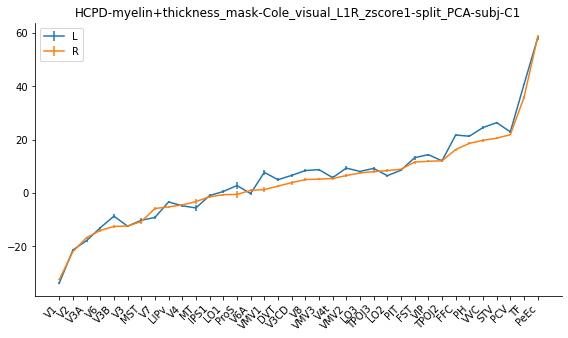

In [10]:
plot_LR_same_axis(
    y_file=pjoin(proj_dir, 'analysis/structure/HCPD-myelin+thickness_mask-Cole_visual_L1R_zscore1-split_PCA-subj_ROI-mean.csv'),
    row='C1', rois=None, y_idx_col=0, figsize=(8, 4.8),
    yerr_file=pjoin(proj_dir, 'analysis/structure/HCPD-myelin+thickness_mask-Cole_visual_L1R_zscore1-split_PCA-subj_ROI-sem.csv'),
    yerr_idx_col=0, sort_hemi='R', title='HCPD-myelin+thickness_mask-Cole_visual_L1R_zscore1-split_PCA-subj-C1'
)